# 60mer design

## 0 Introduction
Investigation of the predicted (SignalP) and synthetic (AutoML) signal peptide sequences requires testing under lab conditions to measure the peptide abundances. In order to achieve this, an experimental design needs to be structured and set of primers should be constructed for the insertion of the desired signal peptide sequences into the chromosome of the _A. oryzae_ RIB40


### Agenda:
- Isolate the top 10-15 signalP sequences 
- Construct primers to insert singalP sequences 

In [2]:
import pandas as pd
from IPython.display import Image

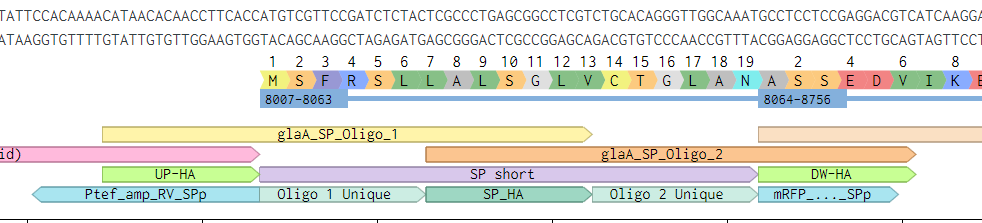

In [3]:
Image(filename='../Data/primer_design.png')

In [5]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

path_to_file = '../Data/FungiDB-62_AoryzaeRIB40_AnnotatedTranscripts.fasta'  

# Open file with "with" statement to avoid problems with access 
transcripts = []

with open(path_to_file, mode='r') as handle:
    for record in SeqIO.parse(handle, 'fasta'):

        # Extract individual parts of the FASTA record
        identifier = record.id
        description = record.description
        sequence = record.seq
        # append
        transcripts.append(record)

In [22]:
transcripts[:3]

[SeqRecord(seq=Seq('ATGCTAATCTCATCAGTGGCGAAGGATGGCTATGGGAAAGACATCTGGACCCTC...TAG'), id='AO090005000001-T', name='AO090005000001-T', description='AO090005000001-T | gene=AO090005000001 | organism=Aspergillus_oryzae_RIB40 | gene_product=protein of unknown function | transcript_product=protein of unknown function | location=Chr1_A_oryzae_RIB40:6423868-6424804(+) | length=888 | sequence_SO=chromosome | SO=protein_coding_gene | is_pseudo=false', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGGACTTGTTGAGACTTCGCGATAGATCCCTGCTGGGCCAAGGCGCCCTTGTC...TGA'), id='AO090005000002-T', name='AO090005000002-T', description='AO090005000002-T | gene=AO090005000002 | organism=Aspergillus_oryzae_RIB40 | gene_product=Cytochrome P450 monooxygenase | transcript_product=Cytochrome P450 monooxygenase | location=Chr1_A_oryzae_RIB40:6420918-6422730(-) | length=1527 | sequence_SO=chromosome | SO=protein_coding_gene | is_pseudo=false', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGGCGATTGCCGCTGCAGTATCCAGTAATGACGTGCTCAAGGGCGTGCCCGAA...TA

In [32]:
# Load the latest form of the singalP dataset
df_signalP = pd.read_csv('../Data/07_H2O_AutoML/ML_rnaseq_normalized_signal_peptides.csv')

# Filter the acccessions which are 22 bp or shorter
df_signalP_filtered = df_signalP[df_signalP["length"] <= 22]
df_signalP_filtered = df_signalP_filtered.reset_index(drop=True) # reset indexing and drop the old index

# Generate list of the first 25 accessions which are the top 25 sequences with highest abundance 
df_signalP_top25_22mer = df_signalP_filtered["Accession"][:25].tolist()
df_signalP_top25_22mer

['AO090103000076',
 'AO090113000063',
 'AO090701000295',
 'AO090020000710',
 'AO090020000162',
 'AO090003001484',
 'AO090011000808',
 'AO090113000062',
 'AO090020000698',
 'AO090003000354',
 'AO090012000708',
 'AO090103000153',
 'AO090001000406',
 'AO090005000560',
 'AO090001000383',
 'AO090003000833',
 'AO090010000729',
 'AO090701000540',
 'AO090038000415',
 'AO090011000119',
 'AO090020000207',
 'AO090103000216',
 'AO090005000189',
 'AO090005001044',
 'AO090001000098']

In [34]:

# Generate list of the first 25 accessions which are the top 25 sequences with highest abundance 
df_signalP_top25_peptides = df_signalP_filtered["sequence"][:25].tolist()
df_signalP_top25_peptides

['MLRVSAIFMACLLLATAA',
 'MPIKSFASRLALSLAICGTAM',
 'MHLPTLVTLACMAVSAS',
 'MKVAIFSTLLPLVLALPAPQT',
 'MRSTLWSLLGLTGLAY',
 'MQFKNLALAASIVATAAAAPAA',
 'MLLTQSLFFAFACWQATPAL',
 'MQLYKVFAVLAALQPAL',
 'MILKSALTAVVLCLAVEGAA',
 'MRSLLWASLLSGVL',
 'MKISAAISTALLAVSAA',
 'MANLIFSLFFCSAVTL',
 'MLSVATSIFGLLATVPLAA',
 'MSLPSFLKWSAMAALMAQLCT',
 'MVALQALSLGLLASQAL',
 'MKPSQLSLLVLLFQASSIQ',
 'MRLFGITLVSAALAA',
 'MQLTKSLLVFALYMFGTQHVL',
 'MRPIPQIIYLIVLLASQLVT',
 'MRFSAIFTLGLAGTALATPLVE',
 'MKWKSLALGLLATAQSAA',
 'MLTVCILLQALLCKSVI',
 'MKGLYLTAALFGASST',
 'MPSTPSLPSMGMLALGAMQLAA',
 'MRFFGGVIATFVVCSSLAD']

In [48]:
# Select SeqRecords with the same gene value as the accession names
top25_seqrecords = []
for acc in df_signalP_top25_22mer:
    for seqrecord in transcripts:
        if seqrecord.description.split('|')[1].strip().split('=')[1] == acc:
            top25_seqrecords.append(seqrecord)

top25_seqrecords

[SeqRecord(seq=Seq('GGTCAATGCTGTAATCACAGACACCTATCGGATTATCCAGGGTAGTAAAAACGT...CCC'), id='AO090103000076-T', name='AO090103000076-T', description='AO090103000076-T | gene=AO090103000076 | organism=Aspergillus_oryzae_RIB40 | gene_product=protein of unknown function | transcript_product=protein of unknown function | location=Chr8_A_oryzae_RIB40:1060893-1061642(+) | length=1067 | sequence_SO=chromosome | SO=protein_coding_gene | is_pseudo=false', dbxrefs=[]),
 SeqRecord(seq=Seq('GCCGTAACACACGAAACGAACTCTAAGTAATCGAACAAAGGGACGTTCCATACA...CCC'), id='AO090113000063-T', name='AO090113000063-T', description='AO090113000063-T | gene=AO090113000063 | organism=Aspergillus_oryzae_RIB40 | gene_product=Extracellular chitosinase | transcript_product=Extracellular chitosinase | location=Chr5_A_oryzae_RIB40:4199684-4201356(+) | length=1501 | sequence_SO=chromosome | SO=protein_coding_gene | is_pseudo=false', dbxrefs=[]),
 SeqRecord(seq=Seq('AATTCCTCACTGTTTTTGCCCACCACCCGTCTTAGACTTTCAATTGCGTTAGTA...TAA'), id

In [29]:
# Isoalte the  sequences from the SeqRecord objects 
nucleotide_sequences = [str(seqrecord.seq) for seqrecord in top25_seqrecords]
nucleotide_sequences

['GGTCAATGCTGTAATCACAGACACCTATCGGATTATCCAGGGTAGTAAAAACGTTTTGGCTCCACTAGGCGCCATAAATAACGCACGGCCCGAAGCCACAGGTATGATCACTAGCAATCCCTGGTGTGTTCAGGTCTTCTTGTCAGGGGTACATAGTTACTATTTCTAAAACTTTCGGGTTTGATCCACCCGGATACGATCCGGAGAGCAAGGGATAGTCTGACCATCACAGTCCAATTGTCAACTCCGGGGTATAAGTATTCGGACAATTCATCTTGTGTTTAGGGATAATCCATCAACAACATTCTCTCATCTACATACGGAAACATTCTTCGCACTATCATCTCTGTTTCTCTTTCTAAACATTTCTTTGTTCTATACATCCGCCAAAATGCTTCGTGTCTCTGCTATCTTCATGGCCTGCCTCCTTCTGGCTACCGCTGCCCCCACCGCTCCTGAGAAGAGCAACGCTTGTCTCTCCATGTGTCTGCAGGAGAGACCTGCTTGTGCTAGTGATGAACGTCCAACTGGCTCTGAGGGCTGCTGGGGTTGCTGCCAGAAAATCGAAGCAGTAGCTGCACCTGTCCAGCGCGCGTCATGTCTCTCCATGTGTCAACAGGAGAAGCCTAATTGTGCTAGCGATGAGAAACCCGCTGGCTCTGAGGGATGCTGGGGCTGCTGCCAGAAAATCGAGCCAGTCGTCCCTGTCAAGAAGGAGATGTGTCTCTCCATGTGTTTGCAAGAGAAGCCTACTTGTGCCAGTGATGAACACCCAACTGGCTCTGAGGGCTGCTGGGGCTGCTGCCAAAAGAACTGAACAACAAGCATCTAAAGACTGATCATGGGATCGTCACATCAAAAGTATTAATTCTCTGTCTAAATTTGTTCAAAAGCAAAAGCAAAAAATGCCTATCTCCAATTTTTATCTCTTAGTTGGCGGATGTCCACTGTGCATTGCAATGTGGACACCGTTCCATGTACGTACTAATGATAAGTCA